### 1. Removing Unnecessary Columns

In [4]:
#Importing important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the dataset

data=pd.read_csv('employee.csv')

In [3]:
#Displaying the shape of the dataset

data.shape

(1470, 35)

In [5]:
#First five rows of the dataset
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [6]:
#Displaying all the columns of the dataset
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
data.shape

(1470, 35)

In [15]:
data[['StandardHours','EmployeeCount','Over18']].value_counts()

StandardHours  EmployeeCount  Over18
80             1              Y         1470
Name: count, dtype: int64

In [16]:
#All the three columns has unique value for the whole dataset. So these columns won't make any difference to the
#target variable. Hence, we drop these three variables from our dataset.
data=data.drop(['StandardHours','EmployeeCount','Over18'],axis=1)

In [17]:
#Number of unique values in the employeenumber column
data['EmployeeNumber'].nunique()

1470

In [18]:
#There are 1470 rows in the dataset and 1470 different values in the EmployeeNumber column. So, there is no point
#of keeping this variable as it has different values for different employess.

data=data.drop('EmployeeNumber',axis=1)

In [19]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [20]:
data.shape

(1470, 31)

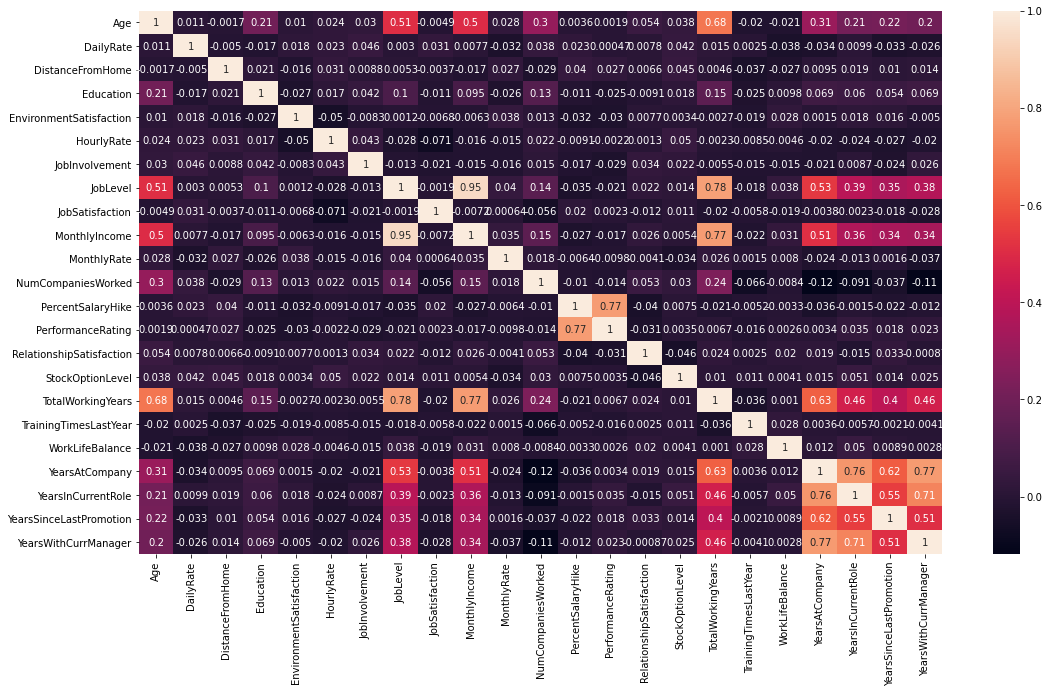

In [14]:
#Finding the correlation among all the variables 

plt.rcParams['figure.figsize']=(18,10)
sns.heatmap(data.corr(),annot=True)

In [21]:
#variables Job Level and Monthly Income are highly correlated with a correlation of 0.95 and 
#the variable years in company is highly correlated with years in current role and years with current manager.
data=data.drop(['JobLevel','YearsInCurrentRole','YearsWithCurrManager'],axis=1)

In [22]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsSinceLastPromotion'],
      dtype='object')

### 2. Decomposing Categorical Features

In [29]:
#Reading dataset

data1=pd.read_csv('fifa.csv')
data1.head()

Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club  ... Composure Marking StandingTackle  SlidingTackle  \
0         FC Barcelona  ...      96.0    33.0           28.0           26.0   
1             Juventus  ...      95.0    28.0           31.0           23.0   
2  Paris Saint-Germain  ...      94.0    27.0           24.0           33.0   
3    Manchester United  ...      68.0    15.0           21.0           13.0   
4      Manchester City  ...      88.0    68.0           58.0           51.0   

  GKDiving  GKHandling  GKKicking  GKPositioning GKReflexes Release Clause  
0      6.0        11.0       15.0           14.0        8.0        €226.5M  
1      7.0        11.0       15.0           14.0       11.0        €127.1M  
2      9.0         9.0       15.0           15.0       11.0        €228.1M  
3     90.0        85.0       87.0           88.0       94.0        €138.6M  
4     15.0        13.0        5.0           10.0       13.0        €196.4M  

[5 rows x 89 columns]

In [30]:
data1.shape

(18207, 89)

In [32]:
#Checkign for the count of all unique country names
data1['Nationality'].value_counts()

Nationality
England                 1662
Germany                 1198
Spain                   1072
Argentina                937
France                   914
                        ... 
New Caledonia              1
Fiji                       1
São Tomé & Príncipe        1
United Arab Emirates       1
Botswana                   1
Name: count, Length: 164, dtype: int64

Top five countries are "England", "Germany", "Spain", "Argentina" and "France" so we keep these five countries and decompose
all other countries into a single category called "others".

In [33]:
def decompose_categorical(x):
    if x=='England':
        return 'England'
    elif x=='Germany':
        return 'Germany'
    elif x=='Spain':
        return 'Spain'
    elif x=='Argentina':
        return 'Argentina'
    elif x=='France':
        return 'France'
    else:
        return 'Others'
    
data1['Nationality']=data1['Nationality'].apply(decompose_categorical)
data1['Nationality'].value_counts()

Nationality
Others       12424
England       1662
Germany       1198
Spain         1072
Argentina      937
France         914
Name: count, dtype: int64

In [34]:
data1['Nationality']

0        Argentina
1           Others
2           Others
3            Spain
4           Others
           ...    
18202      England
18203       Others
18204      England
18205      England
18206      England
Name: Nationality, Length: 18207, dtype: object

### 3. Binning Numerical Features

In [14]:

data2=pd.read_csv('employee.csv')
data2.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [15]:
#Checking for the frequency of different values for the variable
data2['DistanceFromHome'].value_counts()

DistanceFromHome
2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     27
15     26
18     26
26     25
25     25
20     25
28     23
19     22
14     21
12     20
17     20
22     19
13     19
21     18
27     12
Name: count, dtype: int64

We can bin the DistanceFromHome variable into three categories as "Near", "Far" and "Extremely Far".

In [16]:
#Defining the function which will bin the numerical DistanceFromHome variable into Categories

def distance_from_home(x):
    if x <= 2:
        return 'Near'
    elif x > 2 and x <=5:
        return 'Far'
    elif x >5:
        return 'Extremely Far'

data2['DistanceFromHome'] = data2['DistanceFromHome'].apply(distance_from_home)
data2['DistanceFromHome'].value_counts()

DistanceFromHome
Extremely Far    838
Near             419
Far              213
Name: count, dtype: int64

#### task
We can also categories employess on the basis of their total working years in the company.
 Employess who are working for less than 2 years are considered as Novice, employess who are working for
 between 2 to 5 years are considered as Intermediate and employess who are working for more than 5 years in the company are
 considered as Experienced.

In [17]:
#Defining function

def experience_categorization(x):
    if x <= 2:
        return 'novice'
    elif x > 2 and x <= 5:
        return 'intermediate'
    elif x > 5:
        return 'experienced'
    
data2['TotalWorkingYears'] = data2['TotalWorkingYears'].apply(experience_categorization)
data2['TotalWorkingYears'].value_counts()

TotalWorkingYears
experienced     1154
intermediate     193
novice           123
Name: count, dtype: int64

### 4. Aggregating Features

In [5]:
#Reading the dataset

data3=pd.read_csv('Student.csv')
data3.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [6]:
#Calculating the total score for the students.

data3['Total_score']=data3['math score']+data3['reading score']+data3['writing score']

In [7]:
data3

gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  \
0                      none          72             72             74   
1                 completed          69             90             88   
2                      none          90             95             93   
3                      none          47             57             44   
4                      none          76             78             75   
..                      ...         ...            ...            ...   
995               completed          88             99             95   
996                    none          62             55             55   
997               completed          59             71             65   
998               completed          68             78             77   
999                    none          77             86             86   

     Total_score  
0            218  
1            247  
2            278  
3            148  
4            229  
..           ...  
995          282  
996          172  
997          195  
998          223  
999          249  

[1000 rows x 9 columns]

In [8]:
#Calculating the percentage of marks scored for each student.

data3['Percentage']=(data3['Total_score']/300)*100

In [9]:
data3

gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  \
0                      none          72             72             74   
1                 completed          69             90             88   
2                      none          90             95             93   
3                      none          47             57             44   
4                      none          76             78             75   
..                      ...         ...            ...            ...   
995               completed          88             99             95   
996                    none          62             55             55   
997               completed          59             71             65   
998               completed          68             78             77   
999                    none          77             86             86   

     Total_score  Percentage  
0            218   72.666667  
1            247   82.333333  
2            278   92.666667  
3            148   49.333333  
4            229   76.333333  
..           ...         ...  
995          282   94.000000  
996          172   57.333333  
997          195   65.000000  
998          223   74.333333  
999          249   83.000000  

[1000 rows x 10 columns]

We can give grades to all the students according to their percentages.

In [10]:
#Defining the function which give grades to all students according to percentage of amrks obtained.

def grade(x):
    if x>80:
        return 'A'
    elif x>70 and x<80:
        return 'B'
    elif x>60 and x<70:
        return 'C'
    elif x>50 and x<60:
        return 'D'
    elif x>40 and x<50:
        return 'E'
    else:
        return 'F'
    
data3['Grade']=data3['Percentage'].apply(grade)

In [11]:
data3

gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  \
0                      none          72             72             74   
1                 completed          69             90             88   
2                      none          90             95             93   
3                      none          47             57             44   
4                      none          76             78             75   
..                      ...         ...            ...            ...   
995               completed          88             99             95   
996                    none          62             55             55   
997               completed          59             71             65   
998               completed          68             78             77   
999                    none          77             86             86   

     Total_score  Percentage Grade  
0            218   72.666667     B  
1            247   82.333333     A  
2            278   92.666667     A  
3            148   49.333333     E  
4            229   76.333333     B  
..           ...         ...   ...  
995          282   94.000000     A  
996          172   57.333333     D  
997          195   65.000000     C  
998          223   74.333333     B  
999          249   83.000000     A  

[1000 rows x 11 columns]